<a href="https://www.kaggle.com/code/nazargrinchenko/irisvisualisation?scriptVersionId=164594193" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib .pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
Iris = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
Iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#  Let's do **OHE** to the last column, that have 3 unique values. After this we will be able to use

In [5]:
one_hot_encoded = pd.get_dummies(Iris['Species'])

In [6]:
one_hot_encoded.head(5)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [7]:
Iris = Iris.drop('Species', axis=1)

In [8]:
Iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [9]:
Iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [10]:
Iris = pd.concat([Iris, one_hot_encoded], axis=1)
Iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,True,False,False
1,2,4.9,3.0,1.4,0.2,True,False,False
2,3,4.7,3.2,1.3,0.2,True,False,False
3,4,4.6,3.1,1.5,0.2,True,False,False
4,5,5.0,3.6,1.4,0.2,True,False,False


In [11]:
Iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
Iris['Id'].astype(float).value_counts()  # just wanted to try it with integer, but yea, this information is useless I know xD

Id
1.0      1
95.0     1
97.0     1
98.0     1
99.0     1
        ..
51.0     1
52.0     1
53.0     1
54.0     1
150.0    1
Name: count, Length: 150, dtype: int64

In [13]:
print(Iris[['Id', 'SepalLengthCm']].sum())

Id               11325.0
SepalLengthCm      876.5
dtype: float64


In [14]:
Iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
      dtype='object')

# Let's visualise this

In [15]:
Columns = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

Iris_setosa = Iris.loc[Iris['Iris-setosa'] == True, Columns]
Iris_versicolor = Iris.loc[Iris['Iris-versicolor'] == True, Columns]
Iris_virginica = Iris.loc[Iris['Iris-virginica'] == True, Columns]

print(Iris_setosa.shape)
print(Iris_versicolor.shape)
print(Iris_virginica.shape)

(50, 5)
(50, 5)
(50, 5)


In [16]:
print(Iris_setosa.head(5))
print(Iris_versicolor.head(5))
print(Iris_virginica.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
50  51            7.0           3.2            4.7           1.4
51  52            6.4           3.2            4.5           1.5
52  53            6.9           3.1            4.9           1.5
53  54            5.5           2.3            4.0           1.3
54  55            6.5           2.8            4.6           1.5
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
100  101            6.3           3.3            6.0           2.5
101  102            5.8           2.7            5.1           1.9
102  103            7.1  

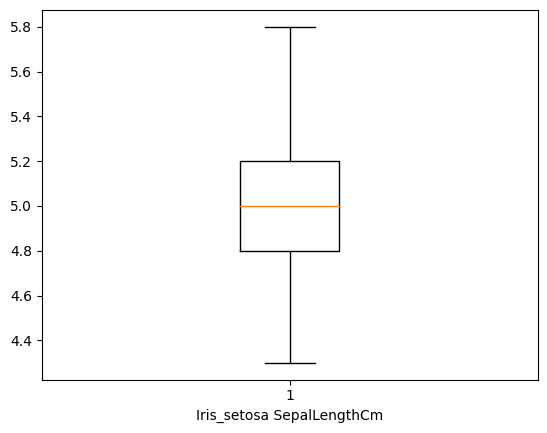

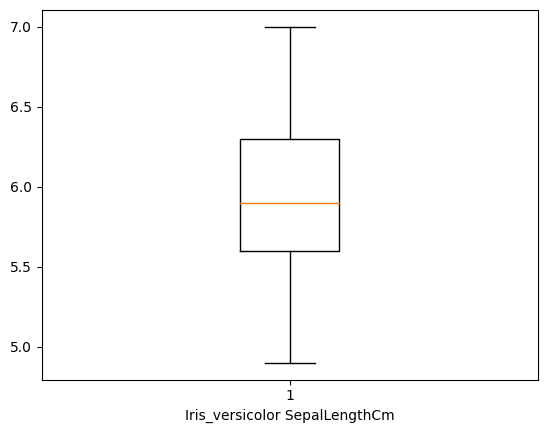

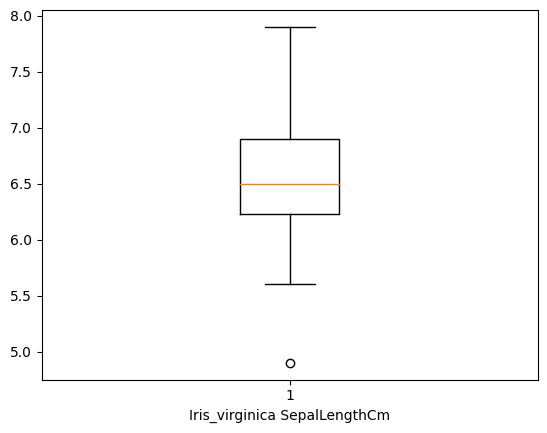

In [17]:
plt.boxplot(Iris_setosa['SepalLengthCm'],widths=0.2)
plt.xlabel('Iris_setosa SepalLengthCm')
plt.show()

plt.boxplot(Iris_versicolor['SepalLengthCm'],widths=0.2)
plt.xlabel('Iris_versicolor SepalLengthCm')
plt.show()

plt.boxplot(Iris_virginica['SepalLengthCm'],widths=0.2)
plt.xlabel('Iris_virginica SepalLengthCm')
plt.show()

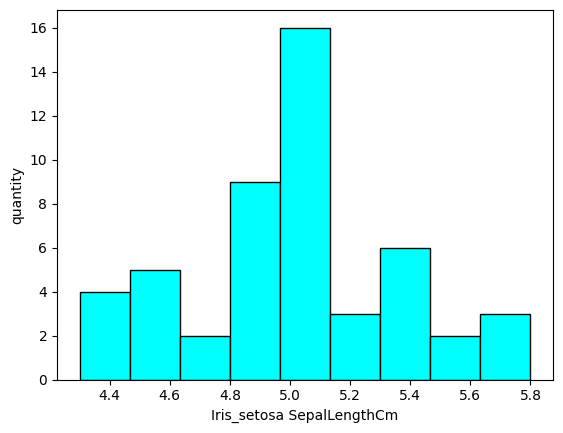

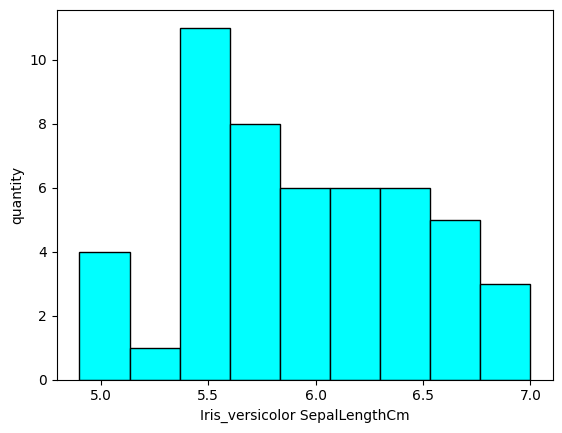

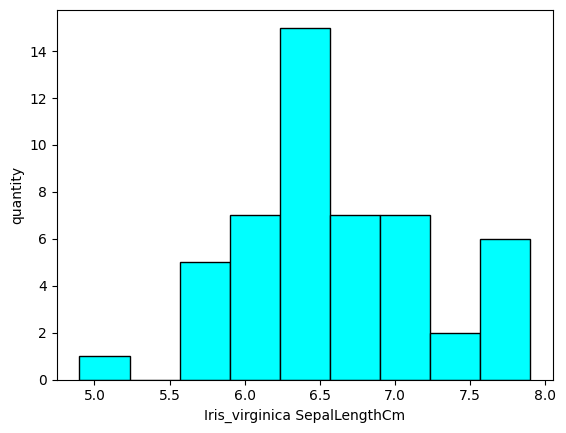

In [18]:
plt.hist(Iris_setosa['SepalLengthCm'],bins=9, facecolor='cyan',edgecolor='black', linewidth=1)
plt.xlabel('Iris_setosa SepalLengthCm')  # change quantity with SepalLengthCm
plt.ylabel('quantity')
plt.show()

plt.hist(Iris_versicolor['SepalLengthCm'],bins=9, facecolor='cyan',edgecolor='black', linewidth=1)
plt.xlabel('Iris_versicolor SepalLengthCm')  # change quantity with SepalLengthCm
plt.ylabel('quantity')
plt.show()

plt.hist(Iris_virginica['SepalLengthCm'],bins=9, facecolor='cyan',edgecolor='black', linewidth=1)
plt.xlabel('Iris_virginica SepalLengthCm')  # change quantity with SepalLengthCm
plt.ylabel('quantity')
plt.show()

Text(0, 0.5, 'quantity')

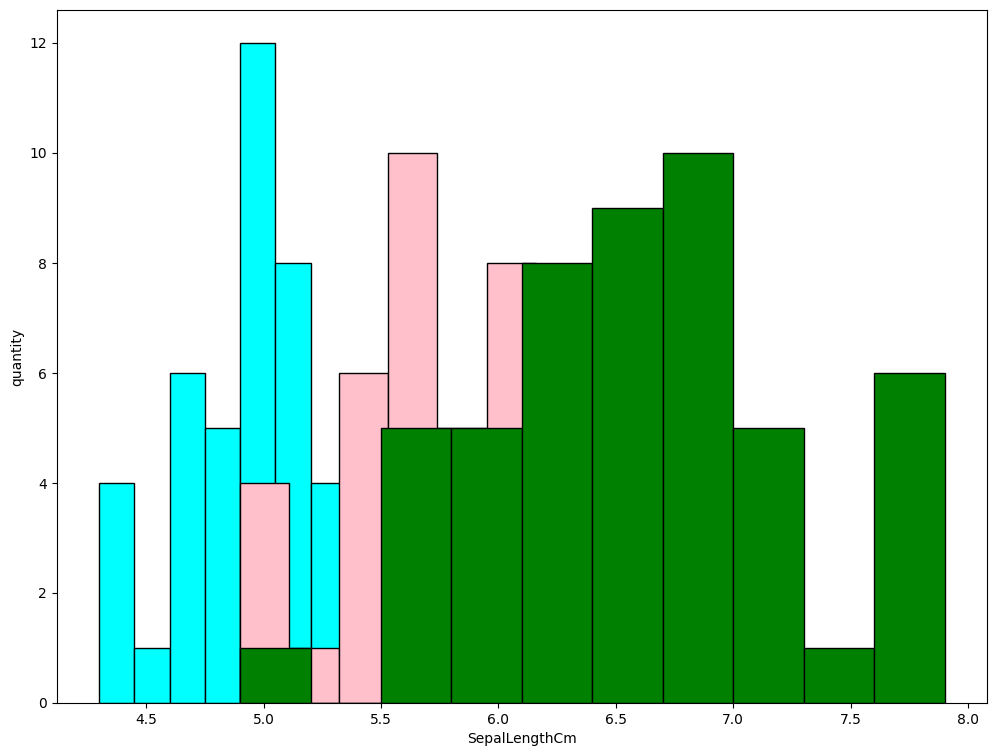

In [19]:
plt.figure(figsize=(12, 9))


plt.hist(Iris_setosa['SepalLengthCm'],bins=10, facecolor='cyan',edgecolor='black', linewidth=1)
plt.hist(Iris_versicolor['SepalLengthCm'],bins=10, facecolor='pink',edgecolor='black', linewidth=1)
plt.hist(Iris_virginica['SepalLengthCm'],bins=10, facecolor='green',edgecolor='black', linewidth=1)

plt.xlabel('SepalLengthCm')
plt.ylabel('quantity')